In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#read data
train= pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
features=train.columns.drop(['y','ID']).values.tolist()
#sort train with y value
train=train.sort_values('y').reset_index(drop=True)
print('len:',len(train))
print('len drop duplicates: ',len(train[features].drop_duplicates()))

len: 4209
len drop duplicates:  3911


In [2]:
#create groupby values
train['y_max']=train.groupby(features,axis=0)['y'].transform('max')
train['y_median']=train.groupby(features,axis=0)['y'].transform('median')
train['y_mean']=train.groupby(features,axis=0)['y'].transform('mean')
train['y_min']=train.groupby(features,axis=0)['y'].transform('min')
train['y_count']=train.groupby(features,axis=0)['y'].transform('count')
#duplicated = count>1
duplicated=(train['y_count']>1)


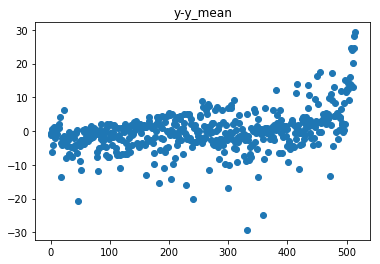

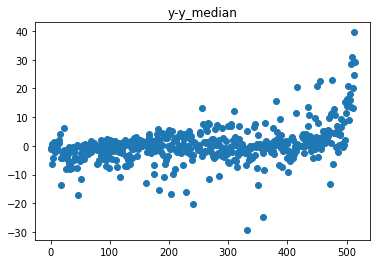

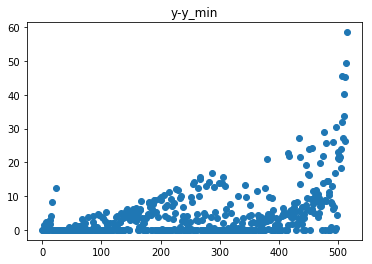

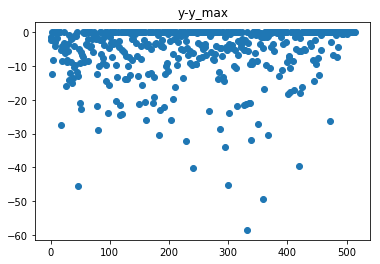

In [3]:
x=range(0,len(train[duplicated]['y']))
for i in ['y_mean','y_median','y_min','y_max']:
    plt.title('y-'+i)
    plt.scatter(y=train[duplicated]['y']-train[duplicated][i],x=x)
    plt.show()
#what noise to use? :)